In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

/home/kc5054/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/kc5054/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/kc5054/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/kc5054/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
crystal=md.load('2w9t.pdb')
rank1=md.load_pdb('2W9T_596c5_unrelaxed_rank_1_model_5.pdb')
rank2=md.load_pdb('2W9T_596c5_unrelaxed_rank_2_model_3.pdb')
rank3=md.load_pdb('2W9T_596c5_unrelaxed_rank_3_model_4.pdb')
rank4=md.load_pdb('2W9T_596c5_unrelaxed_rank_4_model_1.pdb')
rank5=md.load_pdb('2W9T_596c5_unrelaxed_rank_5_model_2.pdb')
print(crystal)

<mdtraj.Trajectory with 1 frames, 2706 atoms, 454 residues, and unitcells>


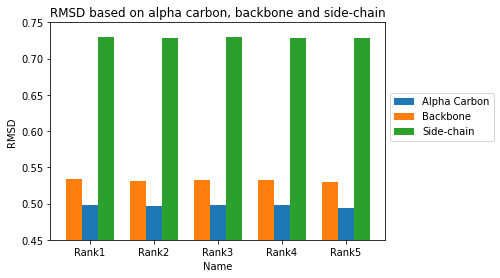

In [49]:
#RMSD based on alpha carbon
rmsd1=md.rmsd(rank1,crystal,atom_indices=crystal.top.select('name CA and chainid 0'))
rmsd2=md.rmsd(rank2,crystal,atom_indices=crystal.top.select('name CA and chainid 0'))
rmsd3=md.rmsd(rank3,crystal,atom_indices=crystal.top.select('name CA and chainid 0'))
rmsd4=md.rmsd(rank4,crystal,atom_indices=crystal.top.select('name CA and chainid 0'))
rmsd5=md.rmsd(rank5,crystal,atom_indices=crystal.top.select('name CA and chainid 0'))
rmsdCA=np.array([rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]).flatten()
#RMSD based on backbone
backbone1=md.rmsd(rank1,crystal,atom_indices=crystal.top.select('backbone and chainid 0'))
backbone2=md.rmsd(rank2,crystal,atom_indices=crystal.top.select('backbone and chainid 0'))
backbone3=md.rmsd(rank3,crystal,atom_indices=crystal.top.select('backbone and chainid 0'))
backbone4=md.rmsd(rank4,crystal,atom_indices=crystal.top.select('backbone and chainid 0'))
backbone5=md.rmsd(rank5,crystal,atom_indices=crystal.top.select('backbone and chainid 0'))
rmsdBB=np.array([backbone1,backbone2,backbone3,backbone4,backbone5]).flatten()
#RMSD based on side chains
sc1=md.rmsd(rank1,crystal,atom_indices=crystal.top.select('sidechain and chainid 0'))
sc2=md.rmsd(rank2,crystal,atom_indices=crystal.top.select('sidechain and chainid 0'))
sc3=md.rmsd(rank3,crystal,atom_indices=crystal.top.select('sidechain and chainid 0'))
sc4=md.rmsd(rank4,crystal,atom_indices=crystal.top.select('sidechain and chainid 0'))
sc5=md.rmsd(rank5,crystal,atom_indices=crystal.top.select('sidechain and chainid 0'))
rmsdSC=np.array([sc1,sc2,sc3,sc4,sc5]).flatten()
Names=np.array(['Rank1','Rank2','Rank3','Rank4','Rank5'])
x=np.array([1,4.2,7.4,10.6,13.8])
fig,ax=plt.subplots()
ax.bar(x,rmsdCA,0.8,label='Alpha Carbon')
ax.bar(x-0.8,rmsdBB,0.8,label='Backbone')
ax.bar(x+0.8,rmsdSC,0.8,label='Side-chain')
ax.set_ybound(0.45,0.75)
ax.set_ylabel('RMSD')
ax.set_xlabel('Name')
ax.set_title('RMSD based on alpha carbon, backbone and side-chain')
plt.xticks(x,labels=Names)
plt.legend(bbox_to_anchor=(1, 0.7))

<mdtraj.Trajectory with 1 frames, 1304 atoms, 161 residues, without unitcells>
<mdtraj.Trajectory with 1 frames, 2706 atoms, 454 residues, and unitcells>
[0.49860692 0.49638548 0.49784493 0.4976556  0.49385992]


In [57]:
print(crystal.top.select('name CA and chainid 0'))

[   1    8   16   22   30   38   45   50   60   68   77   86   97  104
  112  116  128  137  145  154  162  169  183  193  201  208  216  224
  232  241  251  259  268  277  285  292  299  303  311  318  326  333
  341  346  357  366  373  384  393  399  407  411  420  427  435  442
  450  461  472  480  487  494  502  509  517  526  531  537  548  558
  568  577  581  588  596  603  611  619  625  633  641  650  658  667
  676  684  690  694  704  711  722  730  741  745  749  758  765  773
  785  794  799  807  815  823  832  839  847  855  863  875  883  890
  897  905  913  917  926  937  946  950  958  965  976  987  994 1001
 1013 1020 1031 1040 1048 1062 1071 1078 1087 1093 1099 1106 1115 1119
 1128 1136 1144 1153 1162 1170 1177 1185 1192 1202 1209 1220 1228 1238
 1246 1253 1264 1275 1284]
